### Do women international professional footballers score more than men in FIFA World Cup matches?

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

### Import packages

In [25]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu
import warnings

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore')

#### Importing and organizing woman's data

In [26]:
# Importing woman data with date column as datetime
df_woman = pd.read_csv('women_results.csv', index_col = 0, parse_dates= ['date'])

# Sampling data from 20th century world cups tournament matches only (2003-2019)
sample_woman = df_woman[(df_woman['date'] >= '2000') & (df_woman['tournament'] == 'FIFA World Cup')].reset_index(drop=True)

# Defining category
sample_woman.insert(0,'category', 'Woman')

# Creating a column to sum home and away scores
sample_woman['total_goals'] = sample_woman['home_score'] + sample_woman['away_score'] 

sample_woman

,category,date,home_team,away_team,home_score,away_score,tournament,total_goals
0,Woman,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1,Woman,2003-09-20,Norway,France,2,0,FIFA World Cup,2
2,Woman,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
3,Woman,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
4,Woman,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4
...,...,...,...,...,...,...,...,...
195,Woman,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,3
196,Woman,2019-07-02,England,United States,1,2,FIFA World Cup,3
197,Woman,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,1
198,Woman,2019-07-06,England,Sweden,1,2,FIFA World Cup,3


#### Importing and organizing men's data

In [27]:
# Importing men data with date column as datetime
df_men = pd.read_csv('men_results.csv', index_col = 0, parse_dates= ['date'])

# Sampling data from 20th century world cups tournament matches only (2002-2018)
sample_men = df_men[(df_men['date'] >= '2000') & (df_men['tournament'] == 'FIFA World Cup')].reset_index(drop=True)

# Defining category to merge dataframes
sample_men.insert(0,'category', 'Men')

# Creating a column to sum home and away scores
sample_men['total_goals'] = sample_men['home_score'] + sample_men['away_score']

sample_men

,category,date,home_team,away_team,home_score,away_score,tournament,total_goals
0,Men,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
1,Men,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
2,Men,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
3,Men,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
4,Men,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1
...,...,...,...,...,...,...,...,...
379,Men,2022-12-10,England,France,1,2,FIFA World Cup,3
380,Men,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,3
381,Men,2022-12-14,France,Morocco,2,0,FIFA World Cup,2
382,Men,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3


#### Dataframes Merge

In [28]:
total_samples = pd.concat([sample_woman, sample_men])
total_samples

,category,date,home_team,away_team,home_score,away_score,tournament,total_goals
0,Woman,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1,Woman,2003-09-20,Norway,France,2,0,FIFA World Cup,2
2,Woman,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
3,Woman,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
4,Woman,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4
...,...,...,...,...,...,...,...,...
379,Men,2022-12-10,England,France,1,2,FIFA World Cup,3
380,Men,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,3
381,Men,2022-12-14,France,Morocco,2,0,FIFA World Cup,2
382,Men,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3


#### Analysis of total goals distribution in woman/men matches

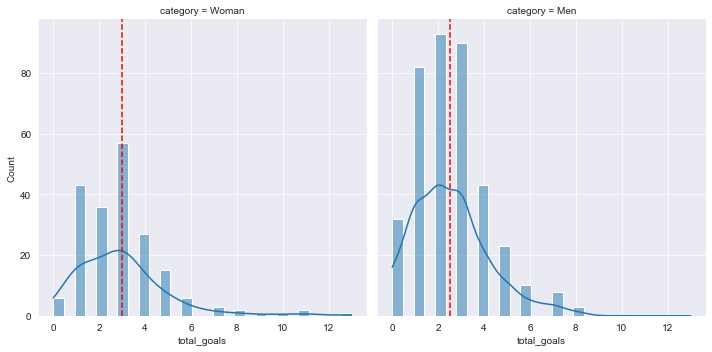

In [29]:
# Changing theme of seaborn plot background to darkgrid
sns.set_style('darkgrid')

graph = sns.displot(data=total_samples, x='total_goals', kde=True, kind = 'hist', col = 'category')

ax1, ax2 = graph.axes[0]
ax1.axvline(sample_woman['total_goals'].mean(), ls='--', color = 'r')
ax2.axvline(sample_men['total_goals'].mean(), ls='--', color = 'r')

#### Vizualizing the distributions, we can see that both are right-skewed and not normal, so a non-parametric test is needed to find the p-value in this hypothetical scenario.

In [30]:
# Mann-Whitney U Test Application
result = mannwhitneyu(sample_woman['total_goals'], sample_men['total_goals'], method="auto", alternative='greater')

# Defining the statistical significance (alfa)
alfa = 0.1

# p-value
p_value = round(result[1],4)

# Conclusion (reject = p-value < alfa, fail to reject = p-value >= alfa)
print(f'With an defined alfa of {alfa} and a p-value of {p_value} obtained from Mann-Whitney U Test, we {"reject" if result[1] < alfa else "fail to reject"} the null hypothesis.')

With an defined alfa of 0.1 and a p-value of 0.0051 obtained from Mann-Whitney U Test, we reject the null hypothesis.
